# **Practice Project: Insurance Cost Analysis**

----------------------------------------------

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="#Intro">Intro</a></li>
    <li><a href="#About-the-Dataset">About the Dataset</a></li>
    <li><a href="#Module-1:-Importing-Data-Sets">Task 1: Importing Data </a></li>
    <li><a href="#Module-2:-Data-Wrangling">Task 2: Data Wrangling</a> </li>
    <li><a href="#Module-3:-Exploratory-Data-Analysis">Task 3: Exploratory Data Analysis</a></li>
    <li><a href="#Module-4:-Model-Development">Task 4: Model Development</a></li>
    <li><a href="#Module-5:-Model-Evaluation-and-Refinement">Task 5: Model Evaluation and Refinement</a></li>
</a></li>
</div>

</div>

<hr>

_importing all required libraries in one place (here):_

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

# Task 1 : Loading the dataset



In [2]:
# Loading the dataset
data = pd.read_csv('Medical_insurance.csv')
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
data.columns = headers
data

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [4]:
data.replace('?', np.nan, inplace = True)


# Task 2 : Data Wrangling

In [5]:
# Inspecting the dataset 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int64  
 1   gender          2772 non-null   object 
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   object 
 5   region          2772 non-null   object 
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB
None


In [6]:
# Checking missing values 
print(data.isnull().sum())

age               0
gender            0
bmi               0
no_of_children    0
smoker            0
region            0
charges           0
dtype: int64


 In our case, the dataset doesnt contain any missing values, if not we would : 
* **Option 1:** use the function ( dropna()) in order to drop rows with missing values 
* **Option 2:** use the function fillna(data.mean(), inplace=True) to fill missing values with mean


In [7]:
data[["charges"]] = np.round(data[["charges"]],2)
print(data.head())

   age  gender     bmi  no_of_children smoker     region   charges
0   19  female  27.900               0    yes  southwest  16884.92
1   18    male  33.770               1     no  southeast   1725.55
2   28    male  33.000               3     no  southeast   4449.46
3   33    male  22.705               0     no  northwest  21984.47
4   32    male  28.880               0     no  northwest   3866.86


In [33]:
# Replacing  NaN in 'smoker' by the most frequent value
is_smoker = data['smoker'].value_counts().idxmax()
data["smoker"].replace(np.nan, is_smoker, inplace=True)

# Replacing NaN in  'age' by the mean
mean_age = data['age'].astype('float').mean(axis=0)
data["age"].replace(np.nan, mean_age, inplace=True)

data[["age", "smoker"]]= data [["age", "smoker"]].astype("int")

print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int32  
 1   gender          2772 non-null   object 
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int32  
 5   region          2772 non-null   object 
 6   charges         2772 non-null   float64
dtypes: float64(2), int32(2), int64(1), object(2)
memory usage: 130.1+ KB
None


In [37]:
# Round the 'charges' column to 2 decimal places
data["charges"] = np.round(data["charges"], 2)

# Display the updated DataFrame
print(data.head())

   age  gender     bmi  no_of_children  smoker     region   charges
0   19  female  27.900               0       0  southwest  16884.92
1   18    male  33.770               1       0  southeast   1725.55
2   28    male  33.000               3       0  southeast   4449.46
3   33    male  22.705               0       0  northwest  21984.47
4   32    male  28.880               0       0  northwest   3866.86


# Task 3 : Exploratory Data Analysis (EDA)

In [32]:
# Summary statistics 
print(data.describe())

               age          bmi  no_of_children  smoker       charges
count  2772.000000  2772.000000     2772.000000  2772.0   2772.000000
mean     39.109668    30.701349        1.101732     0.0  13261.369957
std      14.081459     6.129449        1.214806     0.0  12151.768970
min      18.000000    15.960000        0.000000     0.0   1121.870000
25%      26.000000    26.220000        0.000000     0.0   4687.800000
50%      39.000000    30.447500        1.000000     0.0   9333.015000
75%      51.000000    34.770000        2.000000     0.0  16577.780000
max      64.000000    53.130000        5.000000     0.0  63770.430000


(0.0, 66902.85800000001)

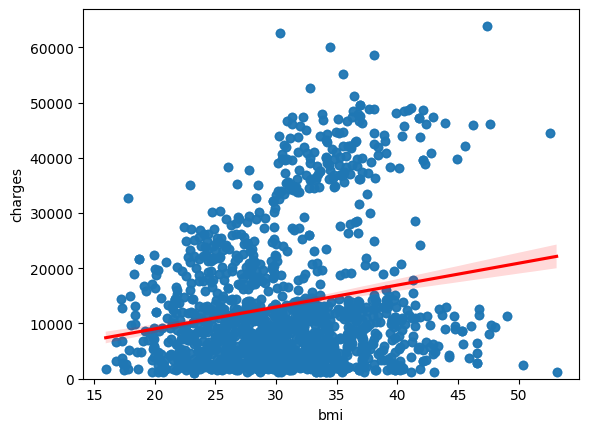

In [39]:
sns.regplot(x="bmi", y="charges", data=data, line_kws={"color": "red"})
plt.ylim(0,)

# Task 4 : Model Development

In [ ]:
X = data[['smoker']]
Y = data['charges']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X, Y))

In [ ]:
# definition of Y and lm remain same as used in last cell. 
Z = data[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(Z,Y)
print(lm.score(Z, Y))

In [ ]:
# Y and Z use the same values as defined in previous cells 
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))

# Task 5 : Model Refinement

In [ ]:
# Z and Y hold same values as in previous cells
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

In [ ]:
# x_train, x_test, y_train, y_test hold same values as in previous cells
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

In [ ]:
# x_train, x_test, y_train, y_test hold same values as in previous cells
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

### Author 

[amalelmahraoui](https://github.com/almasstudyjourney)